In [348]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
#import label encoder
from sklearn import preprocessing

In [349]:
df = pd.read_csv("Car details v3.csv")
print(df.head())

# show the number of missing values in each column
print(df.isnull().sum())
# show the shape of the dataframe
print(df.shape)
# show the data types of each column
print(df.dtypes)

                           name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250N

In [350]:
#drop the rows with missing values
df = df.dropna()


In [351]:
df.head()

#only keep the first word of the car name
df['manufacturer'] = df['name'].apply(lambda x: x.split(' ')[0])

# make the second word of the car name the new column name
df['model'] = df['name'].apply(lambda x: x.split(' ')[1])

df.head()

#drop the name column
df = df.drop('name', axis=1)

In [352]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,manufacturer,model
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,Swift
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,Rapid
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,City
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,i20
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,Swift


In [353]:
# make the mileage column numeric
df['mileage'] = df['mileage'].str.replace('kmpl', '')
df['mileage'] = df['mileage'].str.replace('km/kg', '')
df['mileage'] = df['mileage'].astype(float)

# make the engine column numeric
df['engine'] = df['engine'].str.replace('CC', '')
df['engine'] = df['engine'].astype(float)

# make the max_power column numeric
df['max_power'] = df['max_power'].str.replace('bhp', '')
df['max_power'] = df['max_power'].astype(float)

# show the data types of each column
print(df.dtypes)

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
manufacturer      object
model             object
dtype: object


In [354]:
# transform the categorical data into numbers with label encoder
le = preprocessing.LabelEncoder()
df['manufacturer'] = le.fit_transform(df['manufacturer'])
df['fuel'] = le.fit_transform(df['fuel'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['transmission'] = le.fit_transform(df['transmission'])
df['owner'] = le.fit_transform(df['owner'])
df['model'] = le.fit_transform(df['model'])



In [355]:
df.head()
df.dtypes


year               int64
selling_price      int64
km_driven          int64
fuel               int64
seller_type        int64
transmission       int64
owner              int64
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
manufacturer       int64
model              int64
dtype: object

In [356]:
#drop the name and torque columns
df = df.drop(['torque'], axis=1)



In [357]:
df = df.drop(['model'], axis=1)

In [358]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,manufacturer
0,2014,450000,145500,1,1,1,0,23.40,1248.0,74.00,5.0,20
1,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0,26
2,2006,158000,140000,3,1,1,4,17.70,1497.0,78.00,5.0,10
3,2010,225000,127000,1,1,1,0,23.00,1396.0,90.00,5.0,11
4,2007,130000,120000,3,1,1,0,16.10,1298.0,88.20,5.0,20


In [359]:
y = df['selling_price']
import numpy as np
y = np.log(y)
x = df.drop('selling_price', axis=1)

In [360]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)


# Split der Daten in Training- und Testsets

In [361]:
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# convert the dataframes to tensors
x_train = torch.tensor(x_train.values).float()
x_test = torch.tensor(x_test.values).float()
y_train = torch.tensor(y_train.values).float()
y_test = torch.tensor(y_test.values).float()


# Erstellung des Modells 

In [362]:
class MySimpleNN(torch.nn.Module):   # MySimpleNN erbt von torch.nn.Module

     # Konstruktor
    def __init__(self, input_size=11, hidden_size=(10, 20, 10), output_size=1):
        # Aufruf des Superkonstruktors von torch.nn.Module
        super(MySimpleNN, self).__init__()
        # Definition der Schichten

        # fc1 --> fully connected layer 1 von 12 auf 70 Neuronen
        # warum 12? --> 12 Features
        self.fc1 = torch.nn.Linear(input_size, hidden_size[0])
        # fc2 --> fully connected layer 2 von 70 auf 120 Neuronen
        self.fc2 = torch.nn.Linear(hidden_size[0], hidden_size[1])
        # fc3 --> fully connected layer 3 von 120 auf 30 Neuronen
        self.fc3 = torch.nn.Linear(hidden_size[1], hidden_size[2])
        # fc4 --> fully connected layer 4 von 30 auf 1 Neuronen
        # Warum 1 Neuron? --> 1 Output, wir lesen da den Alkoholgehahlt aus
        self.fc4 = torch.nn.Linear(hidden_size[2], output_size)

        # Batch Normalization
        # 70, 120, 30 sind die Anzahl der Neuronen in den Schichten
        self.bn1 = torch.nn.BatchNorm1d(hidden_size[0])
        self.bn2 = torch.nn.BatchNorm1d(hidden_size[1])
        self.bn3 = torch.nn.BatchNorm1d(hidden_size[2])


    # forward Methode -> Forward Propagation
    # wenn ich später ein Objekt von MySimpleNN erzeuge, dann kann ich
    # dieses Objekt mit einem Tensor aufrufen, dann wird die forward Methode
    # aufgerufen. z.B. model(x_train)
    def forward(self, xb):   # xb steht für eine Batch von X-Werten
        #print("xb", xb.shape)
        z2 = self.fc1(xb)  # dahinter steckt x@w1 + b1
        a2 = torch.relu(z2)    # alle negativen Werte werden auf 0 gesetzt, der Rest bleibt
        #print("a2", a2.shape)
        a2_bn = self.bn1(a2) # Normalisierung der Werte auf den Neuronen
        #print("a2_bn", a2_bn.shape)
        z3 = self.fc2(a2_bn) # dahinter steckt a2@w2 + b2
        #print("z3", z3.shape)
        a3 = torch.relu(z3)
        #print("a3", a3.shape)
        a3_bn = self.bn2(a3)
        #print("a3_bn", a3_bn.shape)
        z4 = self.fc3(a3_bn)
        #print("z4", z4.shape)
        a4 = torch.relu(z4)
        #print("a4", a4.shape)
        a4_bn = self.bn3(a4)
        #print("a4_bn", a4_bn.shape)
        y_hat = torch.relu(self.fc4(a4_bn))
        #print("y_hat", y_hat.shape)
        return y_hat

# Training 

In [363]:
def get_batch(x, y, batch_size):
    for i in range(0, len(x), batch_size):
        # yield: gibt den Wert zurück, aber merkt sich den aktuellen Zustand
        yield x[i:i+batch_size], y[i:i+batch_size]

In [364]:
xb , yb = next(get_batch(x_train, y_train, 10))
model = MySimpleNN()
print(model(xb))

tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.3661],
        [0.1089],
        [0.6331],
        [0.4065],
        [0.0000],
        [0.0000]], grad_fn=<ReluBackward0>)


# Eigenes Modell 

/home/codespace/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([256])) that is different to the input size (torch.Size([256, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/codespace/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([180])) that is different to the input size (torch.Size([180, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  0 Loss:  0.6156066831797455 LR:  0.0001
Epoch:  10 Loss:  0.5627941322206018 LR:  0.0001
Epoch:  20 Loss:  0.5164782905940539 LR:  0.0001
Epoch:  30 Loss:  0.4717289890238637 LR:  0.0001
Epoch:  40 Loss:  0.4314579671127445 LR:  0.0001
Epoch:  50 Loss:  0.3960041598682536 LR:  0.0001
Epoch:  60 Loss:  0.35783561281883436 LR:  0.0001
Epoch:  70 Loss:  0.3265554185610342 LR:  0.0001
Epoch:  80 Loss:  0.2993697384201523 LR:  0.0001
Epoch:  90 Loss:  0.2740948850184132 LR:  0.0001
Epoch:  100 Loss:  0.2515871607752106 LR:  0.0001
Epoch:  110 Loss:  0.23180577183433307 LR:  0.0001
Epoch:  120 Loss:  0.21447733879692565 LR:  0.0001
Epoch:  130 Loss:  0.20012946976354648 LR:  0.0001
Epoch:  140 Loss:  0.19084258263507725 LR:  0.0001
Epoch:  150 Loss:  0.18420868897121365 LR:  0.0001
Epoch:  160 Loss:  0.179095251359644 LR:  0.0001
Epoch:  170 Loss:  0.16473810315358345 LR:  0.0001
Epoch:  180 Loss:  0.13318443630105103 LR:  0.0001
Epoch:  190 Loss:  0.11465224972410643 LR:  0.0001
Epo

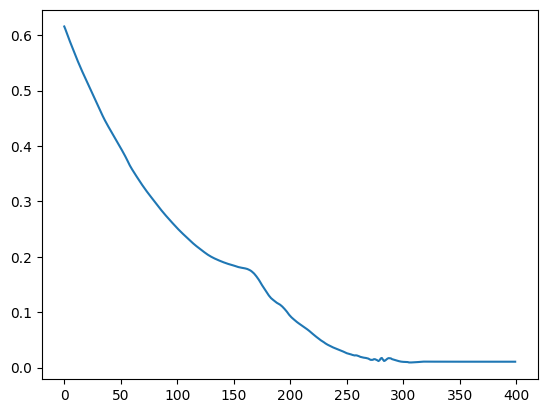

In [365]:
# eigenes Modell wird erstellt
model = MySimpleNN()
lr=0.0001
# trainiere immer mit 256 Datensätzen auf einmal
batch_size=256

# loss function
# Mean Squared Error
# die Lossfunction von Pytorch müssen erstmal erstellt werden mit ()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min',factor=0.1, patience=10)

def train(xb, yb):
    y_hat=model(xb)
    loss = loss_fn(y_hat, yb)
    loss.backward()
    optimizer.step()
    return loss.item()

losses=[]
# import tqdm notebook
for epoch in (range(400)):
    loss_sum=0
    # Iteration über alle Batches
    for xb, yb in get_batch(x_train, y_train, batch_size):
        loss_sum += train(xb, yb)
    loss_epoch = loss_sum/len(x_train)
    losses.append(loss_sum/len(x_train))
    scheduler.step(loss_epoch)
    if epoch % 10 == 0:
        print("Epoch: ", epoch, "Loss: ", loss_epoch, "LR: ", optimizer.param_groups[0]['lr'])

#plot
import matplotlib.pyplot as plt
plt.plot(losses)

# Auswertung

In [368]:
errorSum=0
for xb, yb in get_batch(x_test, y_test, batch_size):
    y_hat=model(xb)
    for i in range(len(yb)):
        errorSum += abs(yb[i]-y_hat[i])

print("mean absolute error:" , errorSum/len(x_test))

mean absolute error: tensor([1.0606], grad_fn=<DivBackward0>)


In [367]:
y_hat=model(x_test[:10])
y = y_test[:10]
print("y_hat: ", y_hat, "y: ", y)

y_hat:  tensor([[21.0388],
        [ 3.4433],
        [12.6169],
        [12.4553],
        [11.3255],
        [12.8621],
        [13.0254],
        [ 8.4576],
        [13.1432],
        [12.9327]], grad_fn=<ReluBackward0>) y:  tensor([13.1244, 12.9945, 11.8494, 13.0753, 13.3375, 12.8479, 12.7939, 12.1281,
        11.9640, 13.3047])
